<a href="https://colab.research.google.com/github/abkerper/DS4002_CS3/blob/main/CS3_Textbooks_Code_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/abkerper/DS4002_CS3

Cloning into 'DS4002_CS3'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 13 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (13/13), 2.41 MiB | 9.62 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [2]:
!pip install nltk

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [5]:
#Import raw csv file
df = pd.read_csv('/content/DS4002_CS3/Materials/textbooks_example.csv')

#Standardize ISBN column to be just a numeric string
df['ISBN'] = df['ISBN'].str.replace("-", "")

#Add column with the word count of each text sample
df['Word Count'] = df['Text'].apply(lambda x: len(x.split()))

Sentment Analysis

In [6]:
#Download vader lexicon package
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [7]:
#Select analyzer
analyzer = SentimentIntensityAnalyzer()

#Add column with the compound sentiment score of each text sample
df['Compound Sentiment'] = df['Text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

In [8]:
#Save cleaned data as CSV file
df.to_csv('CleanedData.csv')

In [9]:
#Display average sentiment score as a new dataframe
average_sentiment = df.groupby('Level')['Compound Sentiment'].mean().reset_index()
display(average_sentiment)

,Level,Compound Sentiment
0,College,-0.978620
1,High School,-0.972467


In [10]:
#Calculate the difference between average compound sentiment scores by subtracting that of college from that of high school
average_sentiment['Compound Sentiment'][1]-average_sentiment['Compound Sentiment'][0]

0.006153333333333233

Example Visuals

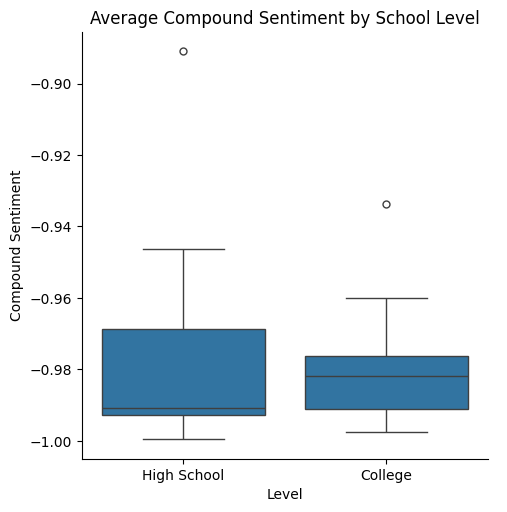

In [11]:
#Create boxplot comparing the average compound sentiment for each school level
sns.catplot(data=df, kind="box", x="Level", y="Compound Sentiment")

#Add title and labels
plt.title('Average Compound Sentiment by School Level')

#Show the plot
plt.show()

Further Analysis Example: Word Count

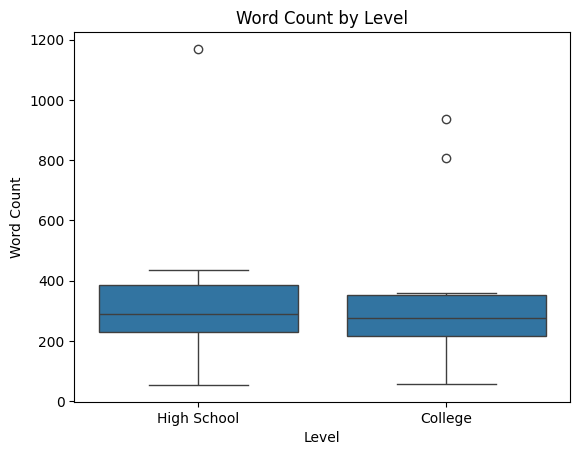

In [12]:
#Create boxplot comparing the average word count for each school level
sns.boxplot(data=df, x='Level', y='Word Count')

#Add title and labels
plt.title('Word Count by Level')
plt.xlabel('Level')
plt.ylabel('Word Count')

#Show the plot
plt.show()

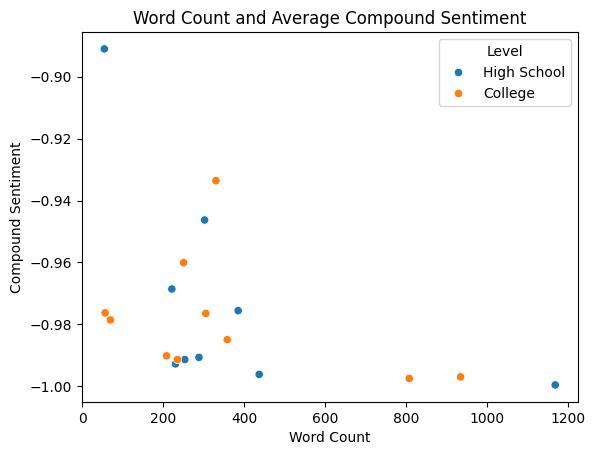

In [13]:
#Create scatter plot to visualize a correlation between word count and average compound sentiment
sns.scatterplot(data=df, x='Word Count', y='Compound Sentiment', hue = 'Level')

#Add title and labels
plt.title('Word Count and Average Compound Sentiment')

#Show the plot
plt.show()

In [14]:
#Display the correlation coefficient between "Word Count" and "Compound Sentiment"
df[['Word Count', 'Compound Sentiment']].corr()

,Word Count,Compound Sentiment
Word Count,1.000000,-0.443559
Compound Sentiment,-0.443559,1.000000
